In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount("/content/gdrive/")
import warnings
warnings.filterwarnings("ignore")


Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
Scaler = StandardScaler()

X = df.drop(['Outcome'], axis = 1)
y = df[['Outcome']]
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.1, random_state  = 0)
X_train = Scaler.fit_transform(X_Train)
X_test = Scaler.transform(X_Test)

In [ ]:
X_train.shape

(691, 8)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
import os
import csv

import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import NearestNeighbors, LocalOutlierFactor
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from tensorflow import keras
import tensorflow as tf
import random as python_random
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
import editdistance

In [ ]:
# Define the model structure
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")

# Embed each integer in a 128-dimensional vector
x = layers.Embedding(100, 128)(inputs)

# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)



# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
main_model = keras.Model(inputs, outputs)

main_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         12800     
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 210,561
Trainable params: 210,561
Non-trainable

In [ ]:
main_model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

model_history = main_model.fit(
    X_train, 
    y_Train, 
    epochs=30,
    batch_size=50, 
    validation_data=(X_test, y_Test))
  

Epoch 1/30
14/14 [==============================] - 14s 166ms/step - loss: 0.6606 - accuracy: 0.6527 - val_loss: 0.6094 - val_accuracy: 0.6623
Epoch 2/30
14/14 [==============================] - 0s 19ms/step - loss: 0.6284 - accuracy: 0.6512 - val_loss: 0.5896 - val_accuracy: 0.6623
Epoch 3/30
14/14 [==============================] - 0s 19ms/step - loss: 0.6030 - accuracy: 0.6643 - val_loss: 0.5378 - val_accuracy: 0.7532
Epoch 4/30
14/14 [==============================] - 0s 18ms/step - loss: 0.5908 - accuracy: 0.6903 - val_loss: 0.5202 - val_accuracy: 0.7792
Epoch 5/30
14/14 [==============================] - 0s 20ms/step - loss: 0.5769 - accuracy: 0.6946 - val_loss: 0.5350 - val_accuracy: 0.7792
Epoch 6/30
14/14 [==============================] - 0s 19ms/step - loss: 0.5808 - accuracy: 0.7048 - val_loss: 0.5218 - val_accuracy: 0.7662
Epoch 7/30
14/14 [==============================] - 0s 18ms/step - loss: 0.5801 - accuracy: 0.6990 - val_loss: 0.5198 - val_accuracy: 0.7792
Epoch 8/30


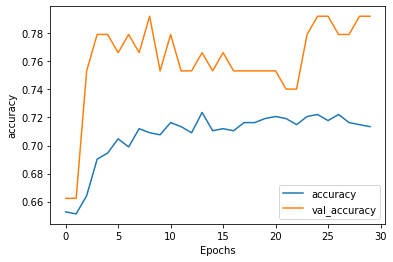

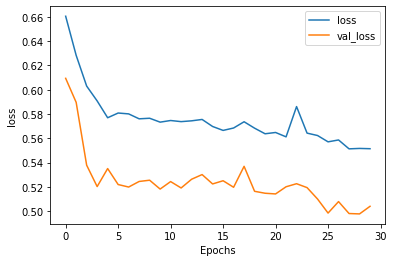

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(model_history, "accuracy")
plot_graphs(model_history, "loss")

In [ ]:
y_pred = main_model.predict(X_test)
y_pred = np.round(y_pred)

In [ ]:
# apply counterfactual approach
X_pred_negative = X_test[y_pred.reshape(y_pred.shape[0]) == 0]

X_pred_negative


array([[-0.54387645, -0.43334843,  0.24780543,  0.5853351 ,  0.15998789,
         0.19191062, -0.18775476, -0.87191292],
       [ 0.04843029, -1.42393181, -0.3754286 , -1.29183022, -0.69587362,
         0.24285578, -0.22737702, -0.70343087],
       [ 0.34458366,  1.45195541,  0.14393309, -0.10295885,  0.80188402,
        -0.80151991,  0.37000483,  1.48683585],
       [-1.13618318, -0.30553122, -0.2196201 , -1.29183022, -0.69587362,
        -0.95435537,  0.59249909, -0.1979847 ],
       [-0.84002981, -1.26416029,  0.14393309, -0.16553103, -0.35352902,
        -0.6996296 , -0.55654662, -0.7876719 ],
       [-0.54387645,  0.20573761, -0.58317328,  0.20990204,  1.65774553,
        -0.55953042,  3.45749371, -0.70343087],
       [ 0.64073703, -0.56116564,  0.14393309,  0.71047946,  0.93026325,
         0.71409846, -0.43158409,  1.82379996],
       [ 0.34458366, -0.20966832,  0.24780543, -1.29183022, -0.69587362,
        -0.91614651,  0.84851989,  1.99228202],
       [-0.54387645, -1.23220599

In [ ]:
X_pred_negative.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
y_Train.shape




(691, 1)

In [ ]:
X_train.shape

(691, 8)

In [ ]:
nn_model = NearestNeighbors(n_neighbors = 1, metric='hamming')

target_label = 1 
y_Train = np.squeeze(y_Train)
X_target_label = X_train[(y_Train)  == target_label, : ] # training using the true labels

nn_model.fit(X_target_label)

NearestNeighbors(metric='hamming', n_neighbors=1)

In [ ]:
# Find the closest neighbor as a counterfactual
closest = nn_model.kneighbors(X_pred_negative, return_distance = False)
trans_results_nn = X_target_label[closest[:, 0]]

trans_results_nn[0]

array([ 3.00996397,  1.73954413, -0.3754286 ,  0.5853351 , -0.69587362,
        0.19191062, -0.77294515,  0.39170249])

Comparison between fraction of valid CFs (i.e. successfully generated counterfactuals)

In [ ]:
y_pred = main_model.predict(X_test)
fraction_success = np.sum(y_pred > 0.5)/y_pred.shape[0]
print(round(fraction_success, 4))

0.1818


In [ ]:
# Counterfactual Results
y_pred_new = main_model.predict(trans_results_nn)
fraction_success_new = np.sum(y_pred_new > 0.5)/y_pred_new.shape[0]
print(round(fraction_success_new, 4))

0.127


Local outlier factor (LOF score)




In [ ]:
clf = LocalOutlierFactor(n_neighbors = 20, novelty = True, contamination = 0.1)
clf.fit(X_target_label)

LocalOutlierFactor(contamination=0.1, novelty=True)

In [ ]:
# Get the LOF score for leave-out validation data
y_pred_val = clf.predict(X_test)
n_error_val = y_pred_test[y_pred_val == -1].size
outlier_score_val = n_error_val/X_test.shape[0]
outlier_score_val

0.06493506493506493

In [ ]:
# Outlier score for 1NN baseline method
# Counterfactual Results
y_pred_test = clf.predict(trans_results_nn)
n_error_test = y_pred_test[y_pred_test == -1].size

outlier_score_test = n_error_test / y_pred_test.shape[0]
print(round(outlier_score_test, 4))

0.0794


Edit distance (Levenshtein)

In [ ]:
def get_edit_distance(original, transformed):
    edit_distance_pair = [editdistance.eval(o, t) for o, t in zip(original.tolist(), transformed.tolist())]
    edit_score = np.mean(edit_distance_pair)
    
    return round(edit_score, 4)

In [ ]:
get_edit_distance(X_test, X_pred_negative)

7.4762

In [ ]:
get_edit_distance(trans_results_nn, X_pred_negative)

5.1429